Page 27 on the datasheet
https://www.monolithicpower.com/en/mpq4214-aec1.html

### R1 and R2 for R_feedback

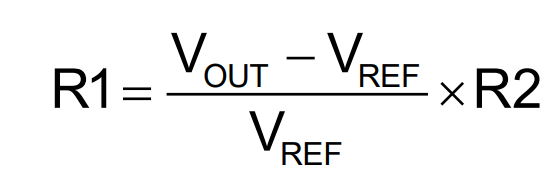

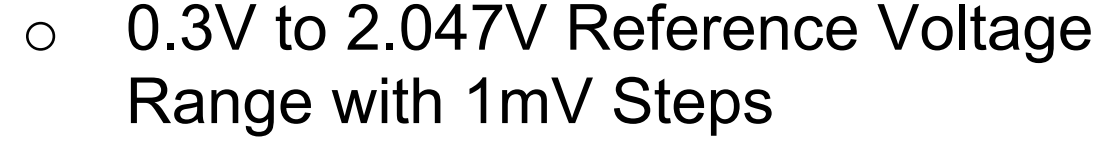

R2 is 1k to 100k

In [11]:
def OutputVoltage(Vref):
    R1 = 88e3 # R16
    R2 = 5e3 # R17
    return (Vref*(R1+R2))/R2

LowerLimit = 0.3 # V
UpperLimit = 2.047 # V
step = 1e-3 # V

Vref = LowerLimit

while(Vref <= UpperLimit):
    print("Vref:", Vref, "Output:",OutputVoltage(Vref))
    Vref += step

Vref: 0.3 Output: 5.58
Vref: 0.301 Output: 5.5986
Vref: 0.302 Output: 5.6172
Vref: 0.303 Output: 5.6358
Vref: 0.304 Output: 5.6544
Vref: 0.305 Output: 5.673
Vref: 0.306 Output: 5.6916
Vref: 0.307 Output: 5.7102
Vref: 0.308 Output: 5.7288
Vref: 0.309 Output: 5.7474
Vref: 0.31 Output: 5.766
Vref: 0.311 Output: 5.7846
Vref: 0.312 Output: 5.8032
Vref: 0.313 Output: 5.8218
Vref: 0.314 Output: 5.8404
Vref: 0.315 Output: 5.859
Vref: 0.316 Output: 5.8776
Vref: 0.317 Output: 5.8962
Vref: 0.318 Output: 5.9148
Vref: 0.319 Output: 5.9334
Vref: 0.32 Output: 5.952
Vref: 0.321 Output: 5.9706
Vref: 0.322 Output: 5.9892
Vref: 0.323 Output: 6.0078
Vref: 0.324 Output: 6.0264
Vref: 0.325 Output: 6.045
Vref: 0.326 Output: 6.0636
Vref: 0.327 Output: 6.0822
Vref: 0.328 Output: 6.1008
Vref: 0.329 Output: 6.1194
Vref: 0.33 Output: 6.138
Vref: 0.331 Output: 6.1566
Vref: 0.332 Output: 6.1752
Vref: 0.333 Output: 6.1938
Vref: 0.334 Output: 6.2124
Vref: 0.335 Output: 6.231000000000001
Vref: 0.336 Output: 6.24960000

SOLVE THIS SHIT @AKASH

### Shunts
Current Limit Voltage Shunt Feeback for DC/DC: 26mV, 32mV, 38mV, 45mV, 50mV, 56mV, 62mV, 68mV

PG Gain for shunt: 40mV, 80mV, 160mV, 320mV

Based on this we choose the 40 mV range.

In [15]:
Voltage_max = 40 #mV
I_max = 2.5 #A
max_resistance = (Voltage_max)/I_max
print("Maximum Resistance:", max_resistance, "mOhms at" , I_max, "A and", Voltage_max, "mV max")
resistance_chosen = 15 #mOhms
max_voltage = resistance_chosen*I_max
print("Maximum voltage:", max_voltage, "mV at" , I_max, "A and", resistance_chosen, "mOhms max")

Maximum Resistance: 16.0 mOhms at 2.5 A and 40 mV max
Maximum voltage: 37.5 mV at 2.5 A and 15 mOhms max


### Gate Resistor Sizing
(Gate Charge)/(Voltage Gate) = Gate_Capacitnce  

In [4]:
Vgs = 10 #V
Qgs = 2.7e-9 # C
Cgs = Qgs/Vgs #F
Cgs

2.7e-10

In [15]:
GateResistor = 1e-9 # Ohms
print("Cutoff freq (kHz):", (1/(2*3.14159*GateResistor*Cgs))/1e3)
print("RC Tau (s):", GateResistor*Cgs)
1/(300e3)

Cutoff freq (kHz): 589463250090512.0
RC Tau (s): 2.7e-19


3.3333333333333333e-06

### Output Parameters

In [50]:
Vin_min = 11 #V
Vin_max = 15 #V
Cin = 7 * 47e-6 #F
Cout = 7 * 47e-6 #F
Fsw = 200e3 # Hz
Iout = 2 #A
L = 15e-6 #H
Isat = 7 #A
Vout_min = 3.3 #V
Vout_max = 24 #V

In [68]:
##### Buck
dil = .5 * Iout
print("Buck Mode")
print("Max Inductor size (uH):", 1e6*(3.3/(Fsw*dil) * (1-(3.3/15))))
print("Max Inductor Current (A):", Iout+dil)
print("Max Input Voltage Ripple (mV):",1e3*(Iout/(Fsw*Cin))*(5/11)*(1-(5/11)))
print("Max Output Voltage Ripple (mV):",1e3*(Iout*(1-(3.3/15)))/(Cout*Fsw))

Buck Mode
Max Inductor size (uH): 12.87
Max Inductor Current (A): 3.0
Max Input Voltage Ripple (mV): 7.5359843251526035
Max Output Voltage Ripple (mV): 23.708206686930094


In [67]:
# Buck
dil = .3 * (Vout_max*Iout)/(Vout_min)
print("Boost Mode")
print("Max Inductor size (uH):", 1e6*(Vin_min*(Vout_max-Vin_min))/(Vout_max*Fsw*dil))
print("Max Inductor Current (A):", 1.5*dil)
print("Max Output Voltage Ripple (mV):",1e3*(Iout*(1-(24/11)))/(Cout*Fsw))

Boost Mode
Max Inductor size (uH): 6.8272569444444455
Max Inductor Current (A): 6.545454545454545
Max Output Voltage Ripple (mV): -35.92152528322741
